In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

tfds.disable_progress_bar()
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [8]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = to_categorical(train_labels)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255 

In [11]:
np.shape(x_train)

(18000, 32, 32, 3)

In [9]:
x_train, x_unlab, y_train, y_unlab = train_test_split( train_images, train_labels , test_size=0.6, random_state=42 )

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split( x_train,y_train , test_size=0.5, random_state=40 )

In [11]:
# Helper function for merging new history objects with older ones
def append_history(losses, val_losses, accuracy, val_accuracy, history):
    losses = losses + history.history["loss"]
    val_losses = val_losses + history.history["val_loss"]
    accuracy = accuracy + history.history["accuracy"]
    val_accuracy = val_accuracy + history.history["val_accuracy"]
    return losses, val_losses, accuracy, val_accuracy


# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [31]:
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_patches': self.num_patches,
            'projection': self.projection,
            'position_embedding': self.position_embedding
        })
        return config

In [32]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(4, (3, 3), strides=(2,2),activation='relu')),
                TimeDistributed(Flatten()),
                layers.LSTM(projection_dim,return_sequences=True,dropout=0.1),
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [20]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = models.Sequential()
    model.add(layers.Conv2D(2, (3, 3), input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(4, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(4, (3, 3),))
    model.add(layers.Conv2D(8, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(8, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(32))
    model.add(layers.Dense(10, activation="softmax"))

    model.summary()
    return model

In [14]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = tf.keras.applications.MobileNetV3Small(
    input_shape=(32,32,3),
    alpha=1.0,
    minimalistic=True,
    include_top=True,
    weights=None,
    input_tensor=None,
    classes=10,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

    model.summary()
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 2)         56        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 4)         76        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 4)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 4)         148       
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                    

32/32 [==============================] - 3s 106ms/step - loss: 1.8076 - accuracy: 0.3438 - val_loss: 1.8642 - val_accuracy: 0.3100
Epoch 21/30
31/32 [============================>.] - ETA: 0s - loss: 1.7957 - accuracy: 0.3465
Epoch 21: val_loss improved from 1.85957 to 1.83900, saving model to FullModelCheckpoint.h5
32/32 [==============================] - 3s 98ms/step - loss: 1.7960 - accuracy: 0.3462 - val_loss: 1.8390 - val_accuracy: 0.3290
Epoch 22/30
31/32 [============================>.] - ETA: 0s - loss: 1.7767 - accuracy: 0.3528
Epoch 22: val_loss improved from 1.83900 to 1.82993, saving model to FullModelCheckpoint.h5
32/32 [==============================] - 3s 91ms/step - loss: 1.7778 - accuracy: 0.3520 - val_loss: 1.8299 - val_accuracy: 0.3330
Epoch 23/30
31/32 [============================>.] - ETA: 0s - loss: 1.7651 - accuracy: 0.3581
Epoch 23: val_loss did not improve from 1.82993
32/32 [==============================] - 4s 114ms/step - loss: 1.7649 - accuracy: 0.3579 - v

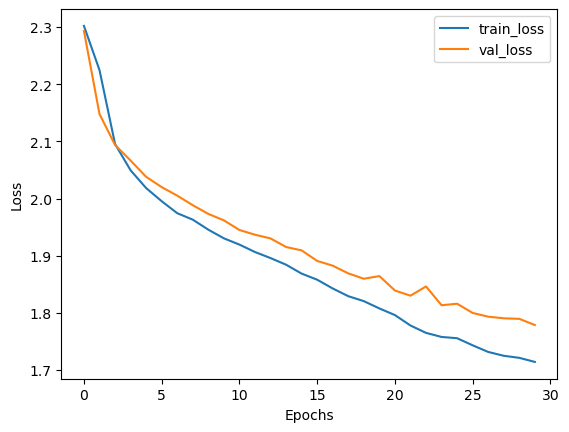

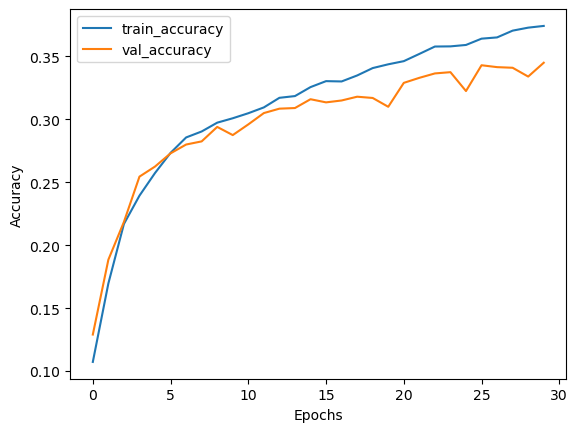

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 1.7872390747070312, 'accuracy': 0.35339999198913574}
----------------------------------------------------------------------------------------------------


In [21]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test):
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )

    history = model.fit( X_train, Y_train, batch_size = 256, epochs=30,
                        validation_split=.20,callbacks=[ keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ), ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_train, X_test, Y_train, Y_test)

In [16]:
def train(model,X_train, Y_train):
    
    checkpoint = keras.callbacks.ModelCheckpoint(
        "AL_Model.h5", save_best_only=True, verbose=1
    )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=8, verbose=1)

    print(f"Starting to train with {len(Y_train)} samples")

    history = model.fit(X_train, Y_train, batch_size = 256, epochs=30,validation_split=.20,
                        callbacks=[checkpoint],
    )
    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )

    return model

In [18]:
def test(model, X_test, Y_test):
    print("-" * 100)
    print("Test set evaluation: ", model.evaluate( X_test, Y_test , verbose=0, return_dict=True), )
    print("-" * 100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 2)         56        
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 4)         76        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 4)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 4)         148       
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 8)         296       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                  

32/32 [==============================] - 5s 150ms/step - loss: 1.7983 - accuracy: 0.3433 - val_loss: 1.8251 - val_accuracy: 0.3350
Epoch 22/30
31/32 [============================>.] - ETA: 0s - loss: 1.7853 - accuracy: 0.3492
Epoch 22: val_loss improved from 1.82515 to 1.82334, saving model to AL_Model.h5
32/32 [==============================] - 4s 120ms/step - loss: 1.7862 - accuracy: 0.3491 - val_loss: 1.8233 - val_accuracy: 0.3340
Epoch 23/30
31/32 [============================>.] - ETA: 0s - loss: 1.7753 - accuracy: 0.3504
Epoch 23: val_loss improved from 1.82334 to 1.81192, saving model to AL_Model.h5
32/32 [==============================] - 4s 112ms/step - loss: 1.7746 - accuracy: 0.3512 - val_loss: 1.8119 - val_accuracy: 0.3410
Epoch 24/30
31/32 [============================>.] - ETA: 0s - loss: 1.7713 - accuracy: 0.3547
Epoch 24: val_loss did not improve from 1.81192
32/32 [==============================] - 4s 117ms/step - loss: 1.7703 - accuracy: 0.3549 - val_loss: 1.8136 - va

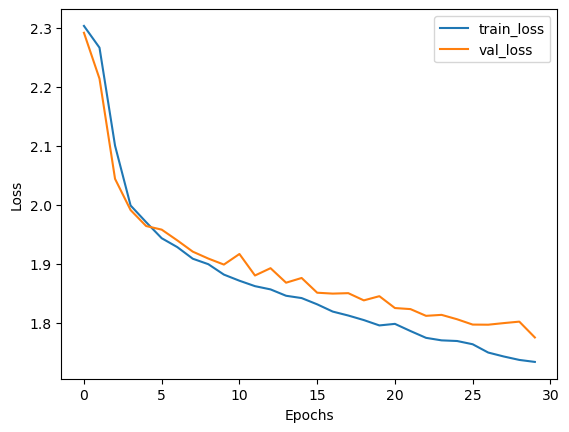

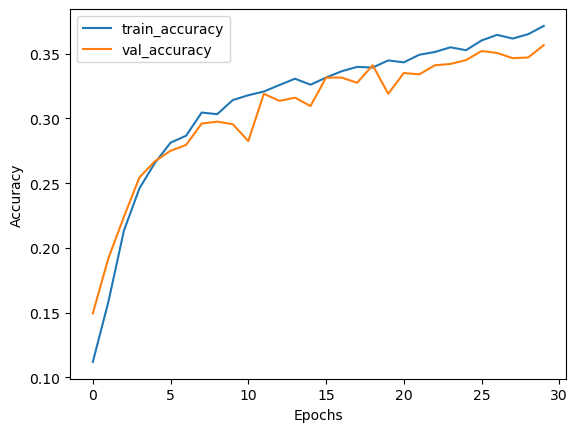




Iteration : 
0



47/47 [==============================] - 1s 8ms/step


MemoryError: Unable to allocate 686. MiB for an array with shape (58499, 32, 32, 3) and data type float32

In [22]:
from sklearn.metrics import confusion_matrix
import random

def train_active_learning_models(
    X_train,
    Y_train,
    x_unlab,
    y_unlab,
    X_test,
    Y_test,
    num_iterations=5
):

    # Creating lists for storing metrics
    losses, val_losses, accuracies, val_accuracies = [], [], [], []

    model = create_model()
    # We will monitor the false positives and false negatives predicted by our model
    # These will decide the subsequent sampling ratio for every Active Learning loop
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics='accuracy',
    )
    
    model = train(model,X_train, Y_train)
    
    l = len(y_unlab)
    x = int(np.round( l/20 ))
    
    for iteration in range(num_iterations-1):
        
        print("\n\n")
        
        print("Iteration : ")
        
        print(iteration)
        
        print("\n\n")
         
        
        rnd = random.sample(range(1, l), x)
        all = list(range(1, l))
        main_list = list(set(all) - set(rnd))
        
        new_lab = x_unlab[rnd]
        arr = np.concatenate((X_train, new_lab))
        X_train = arr

        new_y = np.round(model.predict(new_lab))
        arr = np.concatenate((Y_train, new_y))
        Y_train = arr
        
        
        new_lab = x_unlab[main_list]
        arr = np.concatenate((x_unlab, new_lab))
        x_unlab = arr

        new_y = y_unlab[main_list]
        arr = np.concatenate((y_unlab, new_y))
        y_unlab = arr
        
        test(model, X_test, Y_test)
        
        model = train(model,X_train, Y_train)
        
    
    arr = np.concatenate((X_train, x_unlab))
    X_train = arr

    new_y = np.round(model.predict(x_unlab))
    arr = np.concatenate((Y_train, new_y))
    Y_train = arr
    
    model = train(model,X_train, Y_train)
    
    test(model, X_test, Y_test)
    
    return model

active_learning_model = train_active_learning_models(X_train,Y_train,x_unlab,y_unlab,X_test,Y_test,num_iterations=5)